<a href="https://colab.research.google.com/github/TheKaashymawo/Superstores-Sales-Analysis/blob/main/Superstore_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

**`Let us begin by loading the CSV file into a Dataframe.`**

In [2]:
# import all necessary libraries
# data processing
import pandas as pd

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# import the 12 csv file (each for the 12 months) from google drive and load into separate dataframes

January = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_January_2019.csv', index_col="Order ID")
February = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_February_2019.csv', index_col="Order ID")
March = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_March_2019.csv', index_col="Order ID")

April = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_April_2019.csv', index_col="Order ID")
May = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_May_2019.csv', index_col="Order ID")
June = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_June_2019.csv', index_col="Order ID")

July = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_July_2019.csv', index_col="Order ID")
August = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_August_2019.csv', index_col="Order ID")
September = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_September_2019.csv', index_col="Order ID")

October = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_October_2019.csv', index_col="Order ID")
November = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_November_2019.csv', index_col="Order ID")
December = pd.read_csv('/content/drive/MyDrive/Projects/Superstore Dataset/Datasets/Sales_December_2019.csv', index_col="Order ID")

January.head(3)


,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"


In [3]:
#add an additional "Month" column to all dataframes and assign to it the "respective month value"

January['Month'] = "january"
February['Month'] = "february"
March['Month'] = "march"

April['Month'] = "april"
May['Month'] = "may"
June['Month'] = "june"


July['Month'] = "july"
August['Month'] = "august"
September['Month'] = "september"


October['Month'] = "october"
November['Month'] = "november"
December['Month'] = "december"

In [4]:
# December.info()

In [5]:
#create a list for all the dataframes that needs to be concatenated to one master dataframe
months = [January, February, March, April, May, June, July, August, September, October, November, December]

# Concatenate the 12 dataframes into one master dataframe
dataframe = pd.concat(months, ignore_index = False)

`Then, we take a look at the first 5 observations of the dataframe`

In [6]:
# Return first 5 rows

dataframe.head(5)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",january
141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",january
141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",january


`The cell below shows the size (dimension) of the dataframe i.e rows x columns:`

In [7]:
# dimension of the dataframe
dataframe.shape

(186850, 6)

`Let us print information about the DataFrame. This information contains the number of columns, column labels, column data types, memory usage, and the number of cells in each column (non-null values).`

In [8]:
# print information of dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 141234 to 319670
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Price Each        186305 non-null  object
 3   Order Date        186305 non-null  object
 4   Purchase Address  186305 non-null  object
 5   Month             186850 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


`Let us see what the statistical summary data (percentile, mean and std of the numerical values) look like. It actually shows us a quick glance of how our dataset looks like.`

In [9]:
# summarize the central tendency, dispersion and shape of a dataset's distribution
dataframe.describe()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
count,186305,186305,186305,186305,186305,186850
unique,20,10,24,142396,140788,12
top,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,december
freq,21903,168552,21903,355,355,25117


`The summary above shows there are invalid string values present in our datasets that are not supposed to be there (for example we can see 'Order date' and 'Purchase address' values under the 'Order date' and 'Purchase address' columns respectively. Meaning the column headers must have been repeated multiple times).`

`That is why it is not returning the Mean, percentile and std of the numerical values. Hence we need to drop those values`

# `NULL VALUES, ZERO VALUES & DUPLICATES`

In [10]:
#check for the null rows present in the dataset
dataframe.isnull().sum()

Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month                 0
dtype: int64

In [11]:
#drop the 545 null rows and
dataframe = dataframe.dropna()

# check for the remaining number of rows after dropping the null values
dataframe.shape

(186305, 6)

In [12]:
#check for the invalid values in the dataset from the 'Quantity Ordered' and the 'Price Each' columns as observed in the summary table above
check = dataframe['Quantity Ordered'].unique().tolist()
check2 = dataframe['Price Each'].unique().tolist()
check

['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8']

In [13]:
check2

['700',
 '14.95',
 '11.99',
 '149.99',
 '2.99',
 '389.99',
 '11.95',
 '99.99',
 '150',
 '1700',
 '300',
 '400',
 '3.84',
 '600',
 '109.99',
 '379.99',
 '999.99',
 '600.0',
 'Price Each',
 '700.0',
 '150.0',
 '300.0',
 '1700.0',
 '400.0']

`We can now see that the there are actual repeated column headers in the datasets. Hence we need to drop them.`

In [14]:
# filter for the rows that has the repeated headers as value
dataframe[dataframe['Quantity Ordered'] == 'Quantity Ordered']

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
Order ID,,,,,,
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,january
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,january
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,january
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,january
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,january
...,...,...,...,...,...,...
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,december
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,december
Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,december


`Apparently, the column headers were repeated throughout the dataset - 355 times, hence they need to be dropped from the dataset`

In [15]:
# drop  the rows with repeated headers
dataframe.drop("Order ID", inplace = True)

# check if it has been dropped
check = dataframe['Quantity Ordered'].unique().tolist()
check

['1', '2', '3', '5', '4', '7', '6', '9', '8']

In [16]:
# check for the remaining number of rows after dropping the repeated column headers values
dataframe.shape

(185950, 6)

In [17]:
# clean_df = dataframe[dataframe['Quantity Ordered'] != 'Quantity Ordered']
# clean_df.head(1)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 141234 to 319670
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product           185950 non-null  object
 1   Quantity Ordered  185950 non-null  object
 2   Price Each        185950 non-null  object
 3   Order Date        185950 non-null  object
 4   Purchase Address  185950 non-null  object
 5   Month             185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [18]:
# convert the object datatype to integers and strings, so calculation can be done
dataframe['Quantity Ordered'] = dataframe['Quantity Ordered'].astype(str).astype(float).astype(int)
dataframe['Price Each'] = dataframe['Price Each'].astype(str).astype(float)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 141234 to 319670
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Quantity Ordered  185950 non-null  int64  
 2   Price Each        185950 non-null  float64
 3   Order Date        185950 non-null  object 
 4   Purchase Address  185950 non-null  object 
 5   Month             185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


`Since all the invalid values have been removed, Once again, let us see what the statistical summary data (percentile, mean and std of the numerical values) look like. It actually shows us a quick glance of how our dataset looks like.`

In [19]:
# summarize the central tendency, dispersion and shape of a dataset's distribution
dataframe.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


`Create additional columns (e.g Revenue, City and State) which will be used to draw insights from the dataset.`

In [20]:
# create an additional column (Revenue)
dataframe["Revenue"] = dataframe["Quantity Ordered"] * dataframe["Price Each"]
dataframe

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
Order ID,,,,,,,
141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january,700.00
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january,14.95
141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",january,23.98
141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",january,149.99
141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",january,11.99
...,...,...,...,...,...,...,...
319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",december,14.95
319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",december,7.68
319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",december,400.00


In [21]:
# create an additional columns by extracting City and State from Purchase Address
dataframe[['Street', 'City', 'State']] = dataframe['Purchase Address'].str.split(', ', expand = True)
dataframe.head(2)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Street,City,State
Order ID,,,,,,,,,,
141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january,700.00,944 Walnut St,Boston,MA 02215
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january,14.95,185 Maple St,Portland,OR 97035


In [22]:
dataframe[['Purch. State', 'Postal Code']] = dataframe['State'].str.split(' ', expand = True)
dataframe.head(1)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Street,City,State,Purch. State,Postal Code
Order ID,,,,,,,,,,,,
141234,iPhone,1,700.0,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january,700.0,944 Walnut St,Boston,MA 02215,MA,02215


In [23]:
dataframe.drop('State', axis = 1, inplace = True)
dataframe.head(2)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,Street,City,Purch. State,Postal Code
Order ID,,,,,,,,,,,
141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",january,700.00,944 Walnut St,Boston,MA,02215
141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",january,14.95,185 Maple St,Portland,OR,97035


In [24]:
# check2 = dataframe['Quantity Ordered'].sum()
# check2

# `Exploratory Data Analysis`

---
---


## `#1: Which state had the highest number of sales ?`

In [25]:
performance_state = dataframe.groupby(['Purch. State'])[['Revenue']].sum().sort_values(by = 'Revenue', ascending = False)
# performance_state = performance_state.to_frame()
performance_state

,Revenue
Purch. State,
CA,13714774.71
NY,4664317.43
TX,4587557.15
MA,3661642.01
GA,2795498.58
WA,2747755.48
OR,1870732.34
ME,449758.27


In [26]:
performance_state['Revenue'] = performance_state['Revenue'] / 1000000
performance_state['Revenue']

Purch. State
CA    13.714775
NY     4.664317
TX     4.587557
MA     3.661642
GA     2.795499
WA     2.747755
OR     1.870732
ME     0.449758
Name: Revenue, dtype: float64

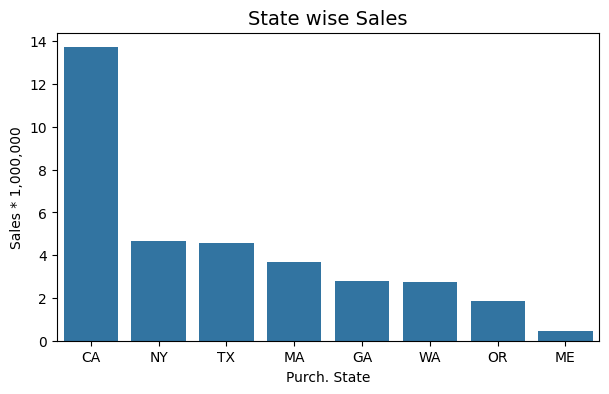

In [27]:

fig, ax = plt.subplots(figsize = ( 7 , 4 ))
sns.barplot(x='Purch. State',y='Revenue',data=performance_state)
ax.set_title( "State wise Sales" , size = 14)
ax.set_ylabel("Sales * 1,000,000")
plt.show()

`1. California (CA) was the top revenue-generating state with significantly higher purchase amounts compared to other states: $13.7m (contributed 40% of the total revenue for the year) followed by New York and Texas with $4.6m and $4.5m respectively.`

`This suggests that California likely has a large customer base or experiences higher demand for the products or services offered by the business.`

`2. Regional Economic Influence: New York (NY) and Texas (TX) follow California in terms of purchase amounts, indicating that these states also play significant roles in contributing to overall revenue. These states are often economic hubs with large populations and diverse consumer markets, which can influence purchasing power and consumption patterns.`

`3. Potential Growth Opportunities: States with relatively lower purchase amounts, such as Oregon (OR) and Maine (ME), may represent opportunities for growth and expansion. Businesses can explore strategies to increase market share in these regions, such as targeted marketing campaigns, partnerships with local businesses, or enhancing product/service offerings to better meet the needs of consumers in these areas.`


## `#2: Which city had the highest number of sales ?`

In [28]:
revenue_city = dataframe.groupby(['City'])['Revenue'].sum().sort_values(ascending = False)
revenue_city = revenue_city.to_frame()
revenue_city

,Revenue
City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58
Dallas,2767975.40
Seattle,2747755.48
Portland,2320490.61
Austin,1819581.75


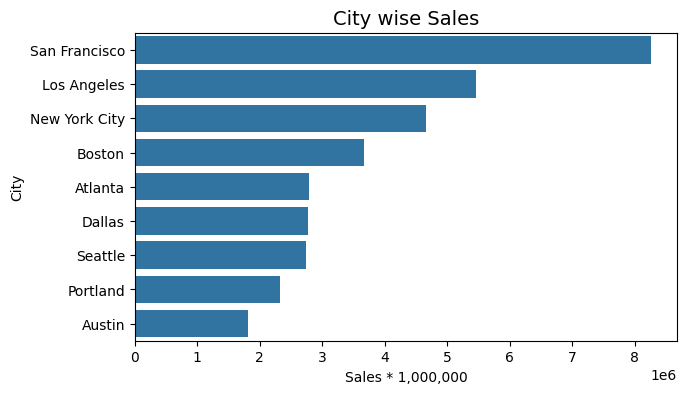

In [29]:
fig, ax = plt.subplots(figsize = ( 7 , 4 ))
sns.barplot(y='City',x='Revenue',data=revenue_city)
ax.set_title( "City wise Sales" , size = 14)
ax.set_xlabel("Sales * 1,000,000")
plt.show()

`1. San Francisco and Los Angeles were the two cities in California that contributed to the profitability of the state both amassing $8.2m and $5.4m respectively followed by New York City, Boston and Atlanta with $4.6m, $3.6m and $2.7m respectively.`

`Just like California, Texas also has stores based in Dallas and Austin making it the top 3 grossing states`

`2. Urban Centers Driving Revenue: Cities like San Francisco, Los Angeles, and New York City stand out as top revenue-generating locations. These urban centers typically have larger populations, higher consumer spending power, and greater economic activity, contributing to significant revenue generation for businesses operating in these areas.`

`3. Market Penetration and Competition: Revenue figures for cities like Portland and Austin, while substantial, are comparatively lower than major urban centers like San Francisco or New York City. This suggests that while these cities represent significant markets, there may be greater competition or market saturation in these areas, impacting revenue potential for businesses.`





## `#3: What is the revenue contribution per month ?`

In [30]:
revenue_month = dataframe.groupby(['Month'])['Revenue'].sum().sort_values(ascending = False)
revenue_month = revenue_month.to_frame()
revenue_month

,Revenue
Month,
december,4619297.12
october,3736884.05
april,3396059.11
november,3198909.23
may,3144584.80
march,2809063.30
july,2646899.69
june,2578293.30
august,2244412.31


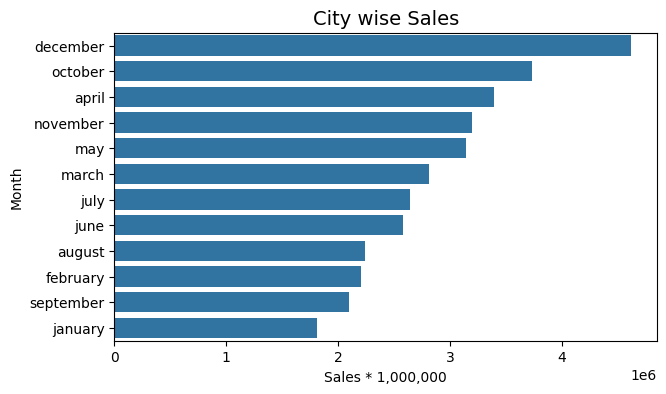

In [31]:
fig, ax = plt.subplots(figsize = ( 7 , 4 ))
sns.barplot(y='Month',x='Revenue',data=revenue_month)
ax.set_title( "City wise Sales" , size = 14)
ax.set_xlabel("Sales * 1,000,000")
plt.show()

`1. Year-End Boost: December stands out as the month with the highest revenue, indicating that end-of-year factors such as holiday spending or year-end budget allocations may significantly impact revenue.`

`2. Consistency in Mid-Year Months: Months like May, June, and July also show relatively high revenue figures, suggesting a consistent performance during the middle months of the year. This could be due to various factors such as seasonal promotions, marketing campaigns, or favorable market conditions during those periods.`

`3. Potential Areas for Improvement: Conversely, months like January and September have comparatively lower revenues. This might indicate areas where the company could focus on improving sales strategies or implementing targeted marketing campaigns to boost revenue during traditionally slower periods.`


## `#4: Volume of products sold per month ?`

In [32]:
unit_sold_month = dataframe.groupby(['Month'])['Quantity Ordered'].sum().sort_values(ascending = False)
unit_sold_month = unit_sold_month.to_frame()
unit_sold_month

,Quantity Ordered
Month,
december,28121
october,22705
april,20568
november,19808
may,18657
march,17006
july,16069
june,15255
february,13461


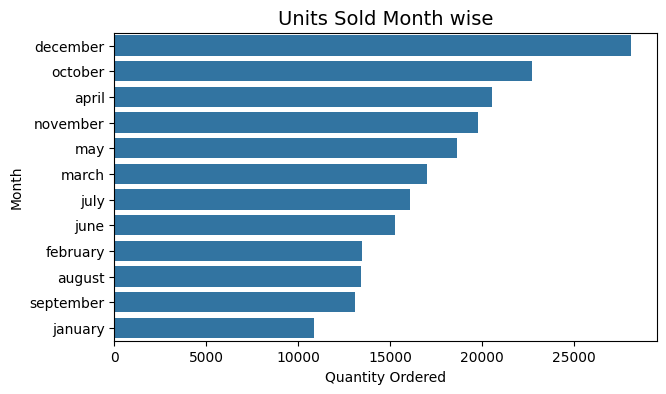

In [33]:
fig, ax = plt.subplots(figsize = ( 7 , 4 ))
sns.barplot(y='Month',x='Quantity Ordered',data=unit_sold_month)
ax.set_title( "Units Sold Month wise" , size = 14)
# ax.set_xlabel("Sales * 1,000,000")
plt.show()

`1. Correlation with Revenue: There seems to be a correlation between the quantity of orders and revenue generated. Months with higher quantities ordered, such as December and October, also tend to have higher revenue. This correlation suggests that increased sales volume contributes to higher revenue figures.`

`2. Seasonal Demand: Similar to revenue patterns, there are fluctuations in the quantity of orders throughout the year. Months like December, October, and April consistently show higher quantities ordered, indicating potential seasonal peaks in demand. This aligns with traditional consumer behavior, where holidays, special events, or seasonal trends influence purchasing decisions.`

`3. Identifying Growth Areas: Months with lower quantities ordered, such as January and September, may represent opportunities for growth or improvement. The Business can explore strategies to stimulate demand during these slower months, such as introducing new products, enhancing marketing efforts, or offering incentives to attract customers.`